# Multiple Linear Regression

In [95]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [96]:
# Using the fifth dataset here
data = pd.read_csv("dataset5.csv")
data.head()

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net hourly electrical energy outpu
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [97]:
X = data.drop("Net hourly electrical energy outpu", axis=1)
Y = data["Net hourly electrical energy outpu"]

## Ambient Temperature v/s Net Hourly Electrical Energy Output

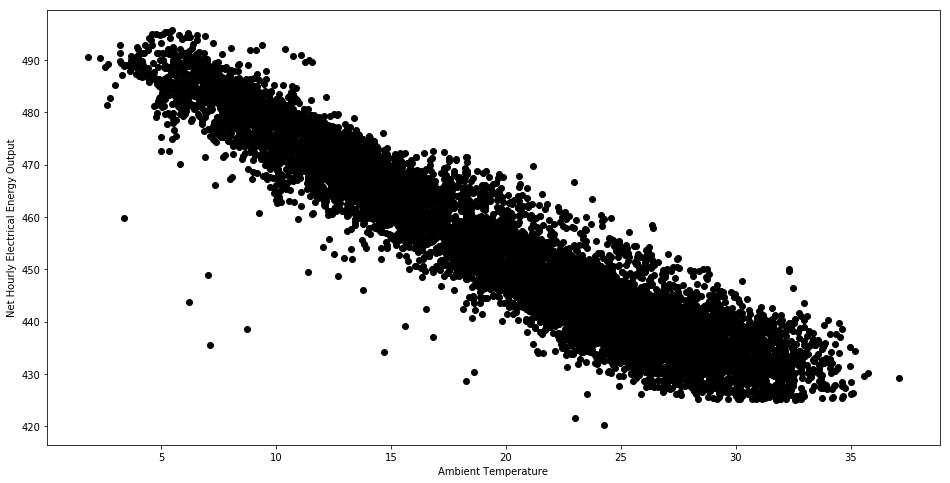

In [98]:
plt.figure(figsize=(16, 8))
plt.scatter(data["Ambient Temperature"], Y, c="black")
plt.xlabel("Ambient Temperature")
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

## Exhaust Vacuum v/s Net Hourly Electrical Energy Output

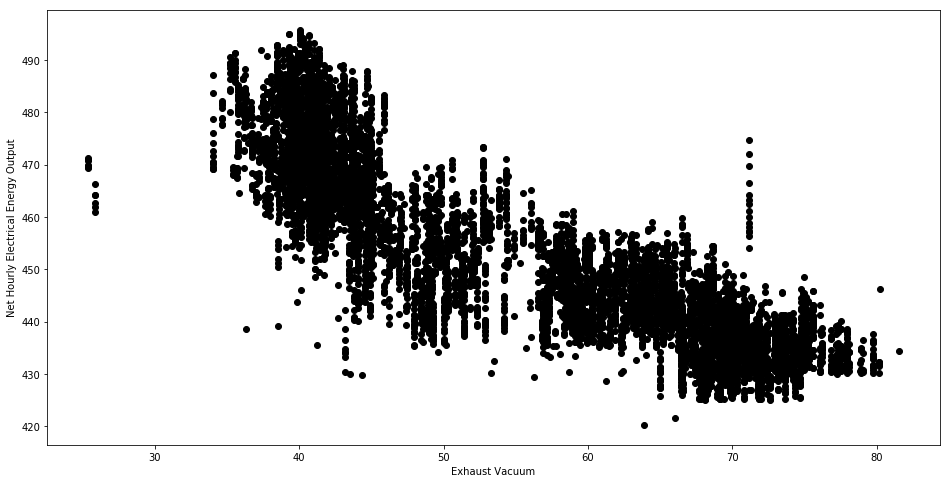

In [99]:
plt.figure(figsize=(16, 8))
plt.scatter(data["Exhaust Vacuum"], Y, c="black")
plt.xlabel("Exhaust Vacuum")
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

## Ambient Pressure v/s Net Hourly Electrical Energy Output

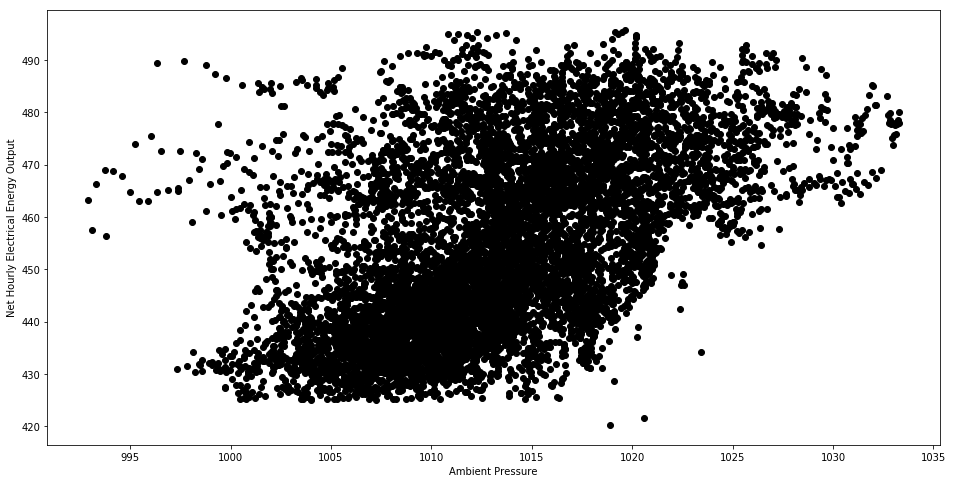

In [100]:
plt.figure(figsize=(16, 8))
plt.scatter(data["Ambient Pressure"], Y, c="black")
plt.xlabel("Ambient Pressure")
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

## Relative Humidity v/s Net Hourly Electrical Energy Output

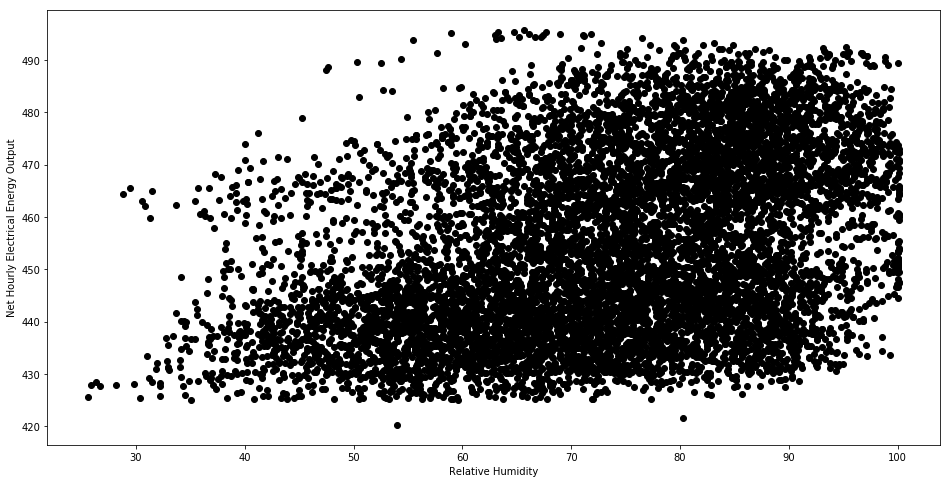

In [101]:
plt.figure(figsize=(16, 8))
plt.scatter(data["Relative Humidity"], Y, c="black")
plt.xlabel("Relative Humidity")
plt.ylabel("Net Hourly Electrical Energy Output")
plt.show()

## Regression Details

In [102]:
Xs = sm.add_constant(X)
model = sm.OLS(Y, Xs)
model = model.fit()
print model.summary2()

                           Results: Ordinary least squares
Model:              OLS                                Adj. R-squared:     0.929     
Dependent Variable: Net hourly electrical energy outpu AIC:                56186.2290
Date:               2019-04-22 15:21                   BIC:                56222.0599
No. Observations:   9568                               Log-Likelihood:     -28088.   
Df Model:           4                                  F-statistic:        3.114e+04 
Df Residuals:       9563                               Prob (F-statistic): 0.00      
R-squared:          0.929                              Scale:              20.778    
---------------------------------------------------------------------------------------
                          Coef.     Std.Err.       t       P>|t|     [0.025     0.975] 
---------------------------------------------------------------------------------------
const                    454.6093     9.7485     46.6337   0.0000   435.500

## Prediction

In [103]:
columns = ["Ambient Temperature", "Exhaust Vacuum", "Ambient Pressure", "Relative Humidity"]
test_data = pd.DataFrame(columns=columns)
test_data.loc[len(test_data)] = [15, 42, 1025, 72]
test_data.loc[len(test_data)] = [13, 32, 1009, 54]
test_data

,Ambient Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity
0,15,42,1025,72
1,13,32,1009,54


In [104]:
test_data = sm.add_constant(test_data)
print test_data

   const Ambient Temperature Exhaust Vacuum Ambient Pressure Relative Humidity
0    1.0                  15             42             1025                72
1    1.0                  13             32             1009                54


In [105]:
predictions = model.predict(test_data)
predictions

0    467.377
1    475.523
dtype: object

The adjusted-R<sup>2</sup> value of 0.929 tells us that the model is a really good fit. The p-values tell us that all the independent variables are statistically significant in the model. Also, the low std. error values tells us about the good accuracy of this model.